<a href="https://colab.research.google.com/github/AlexErmakov77/ML-Python/blob/main/7_1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(font_scale=1.3)

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

# Метод главных компонент
### (Principal component analysis, PCA)

Интерактивная визуализация PCA и собственных векторов:

* <a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis</a>

* <a href="http://setosa.io/ev/eigenvectors-and-eigenvalues/">Eigenvectors and Eigenvalues</a>

## 1. SVD-разложение

Генерируем датасет из равномерного распределения.

In [ ]:
X = np.random.normal(size=(100, 10))
print(X.shape)

(100, 10)


In [ ]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.547927,-0.558388,1.467921,1.179150,1.868562,-1.796290,-0.161678,0.909683,-0.274448,-1.956684
1,0.942699,-0.767488,1.065405,-0.078005,1.145573,-0.167629,-0.816839,-1.495096,1.251155,0.278344
2,-0.213923,0.197902,0.215033,-0.707414,2.201034,0.046216,0.281905,-0.773240,0.489392,1.430301
3,-1.254976,1.000932,-0.832247,1.855906,-0.574096,-0.215837,-1.151302,0.403798,1.809114,0.421928
4,-0.169044,-0.072179,0.085675,-2.125354,-0.337402,1.510721,-1.302507,-0.052181,-0.084283,0.746003
...,...,...,...,...,...,...,...,...,...,...
95,-0.124939,0.276575,-0.176292,0.764037,0.522884,-0.783052,-0.518370,0.274107,0.291226,-0.275586
96,1.659421,1.054396,-0.189570,1.744410,-0.907537,-0.917657,0.089973,0.057747,-0.313159,-0.352347
97,0.129393,1.719923,0.808047,-0.701065,0.780095,1.987718,1.983004,0.096376,-0.116244,0.073628
98,0.143582,1.087926,-1.554464,0.528326,-0.323681,-0.707722,0.450560,1.055598,0.298070,-1.220625


Вот так можно вычислять сингулярное разложение этого датасета.

In [ ]:
U, D, V = sp.linalg.svd(X, full_matrices=False)  # If True (default), U and Vh are of shape (M, M), (N, N). If False, the shapes are (M, K) and (K, N), where K = min(M, N).
print(U.shape, D.shape, V.shape)

(100, 10) (10,) (10, 10)


Проверим, что получилось. Восстановим датасет и сравним с исходной версией.

In [ ]:
D

array([12.04296675, 11.83126763, 11.19462869, 10.38370498, 10.22799862,
        9.99246229,  8.84257236,  8.05842439,  7.88004803,  7.06714966])

In [ ]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
D * np.eye(10)

array([[12.04296675,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 11.83126763,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 11.19462869,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 10.38370498,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 10.22799862,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         9.99246229,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  8.84257236,  0.        

In [ ]:
X_restored = np.dot(U, np.dot(D * np.eye(10), V))
print(np.allclose(X_restored, X))


True


Восстановленная версия действительно очень близка к исходной.

## 2. PCA

Реализация из sklearn:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA">`sklearn.decomposition.PCA`</a>`(n_components=None)`

Методы класса:
* `fit(X)` — обучиться на данных `X`;
* `fit_transforn(X)` — обучиться на данных `X` и вернуть сжатое представление `X`;
* `transform(X_new)` — вернуть сжатое представление `X_new` для обученной ранее модели;
* `inverse_transform(Y)` — восстановить сжатые данные `Y` в исходное пространство.

Атрибуты класса:

* `components_` — главные компоненты в порядке убывания собственных чисел, размер (n_components, n_features);
* `explained_variance_` — дисперсия вдоль главных компонент, равны собственным числам, размер (n_components,);
* `explained_variance_ratio_` —- доля дисперсии, объясняемая каждой компонентой, размер (n_components,);
* `mean_` — среднее по данным, размер (n_components,);
* `noise_variance_` — оценка дисперсии шума для метода Probabilistic PCA.

Другие модификации, реализованные в sklearn:

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA">`KernelPCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA">`SparsePCA`</a>;
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA">`IncrementalPCA`</a>.

Генерируем двумерный датасет из нормального распределения.

In [ ]:
X = np.random.multivariate_normal(size=150, mean=[0, 3], cov=[[3, 1], [1, 1]])
# X = np.random.multivariate_normal(size=150, mean=[0, 3, 4, 5], cov=[[3, 1, 2, 1], [1, 1, 1, 1], [3, 4, 9, 1], [3, 1, 3, 5]])

In [ ]:
X.shape

(150, 2)

In [ ]:
pd.DataFrame(X)

,0,1
0,1.535421,3.725915
1,1.318953,4.733106
2,-2.321922,4.098919
3,0.185736,3.906440
4,3.679362,4.083807
...,...,...
145,-0.605334,3.727698
146,-0.950844,2.353587
147,-0.430606,3.565085
148,-0.292251,2.109989


In [ ]:
pca = PCA(n_components=1)
# pca = PCA(n_components=2)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)

In [ ]:
Y.shape

(150, 1)

In [ ]:
X_hat.shape

(150, 2)

Его главные компоненты (точнее, одна компонента) — двумерные векторы.

In [ ]:
pca.components_

array([[-0.90789869, -0.41918965]])

Вектор средних:

In [ ]:
pca.mean_

array([-0.14141118,  2.93468286])

На первом графике синим отмечены исходные точки, красным - они же после проецирования и обратного преобразования.
На втором графике точки в одномерном пространстве.

In [ ]:
pd.DataFrame(X)

,0,1
0,1.535421,3.725915
1,1.318953,4.733106
2,-2.321922,4.098919
3,0.185736,3.906440
4,3.679362,4.083807
...,...,...
145,-0.605334,3.727698
146,-0.950844,2.353587
147,-0.430606,3.565085
148,-0.292251,2.109989


In [ ]:
pd.DataFrame(X_hat)

,0,1
0,1.541897,3.711890
1,1.746785,3.806490
2,-1.495676,2.309400
3,0.498083,3.229946
4,3.445311,4.590723
...,...,...
145,-0.222007,2.897471
146,-1.029765,2.524518
147,-0.139869,2.935395
148,-0.579609,2.732361


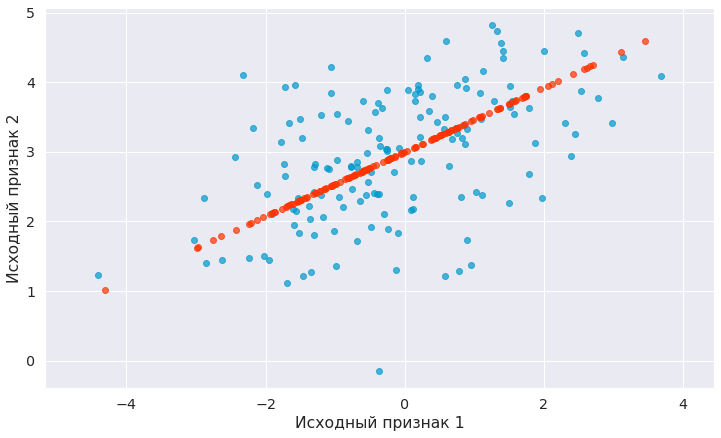

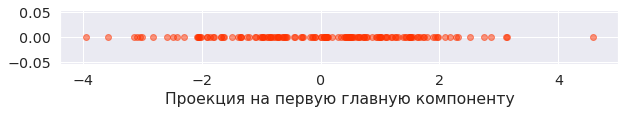

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, color=blue)
plt.scatter(X_hat[:, 0], X_hat[:, 1], color=red, alpha=0.7)
plt.xlabel('Исходный признак 1')
plt.ylabel('Исходный признак 2')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), alpha=0.5, color=red)
plt.xlabel('Проекция на первую главную компоненту')
plt.show()

# Другие методы снижения размерности

http://scikit-learn.org/stable/modules/manifold.html#manifold

Примеры:

http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py